<H3 align = "left"> Detecting Arrhythmia Variant using Electrocardiogram Data </H3>

In [119]:
##############################################
## Packages Needed for this Assignmnent ##
##############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [120]:
# Import the dataset
dataset = pd.read_csv("MIT-BIH Arrhythmia Database.csv")

TODO:
- take representative sample of dataset (aim for 15,000 rows)
- perform preprocessing 

In [121]:
# Random_state=42 ensures that each time this code runs, we will get the same N rows in the sample 
sampleOfData = dataset.sample(n=15000, random_state=777)

# To get different samples use sampleOfData = dataset.sample(n=NUMBER) 
#sampleOfData = dataset.sample(n=15000)


## Understanding the Data

- "record" is the name of the subject/patient.
- "type" is the target, which contains 5 categories of heart beats:
    1. N (Normal)
    2. SVEB (Supraventricular ectopic beat)
    3. VEB (Ventricular ectopic beat)
    4. F (Fusion beat)
    5. Q (Unknown beat)


## Data Visualization 

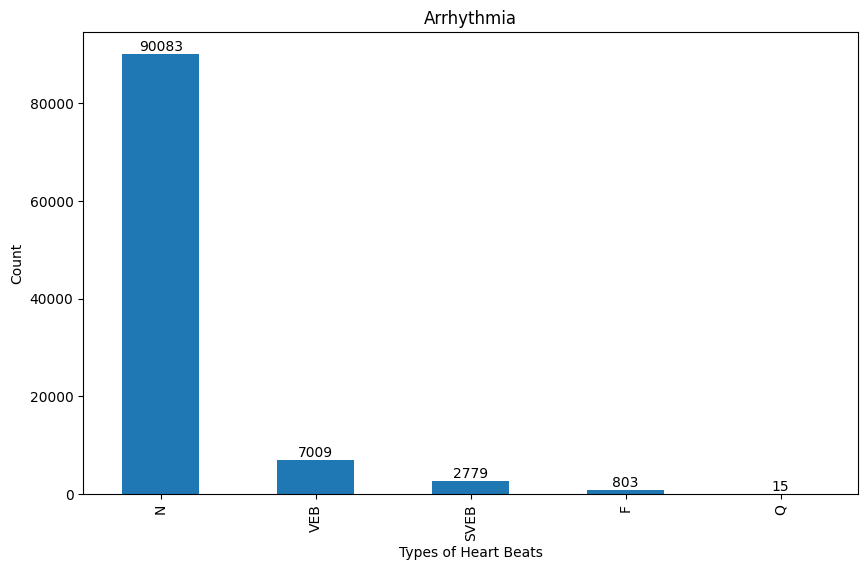

In [122]:
# Entire dataset 
data = dataset['type'].value_counts()

# Sample dataset 
#data = sampleOfData['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
bars = data.plot(kind='bar')

# Set the title and labels
plt.title('Arrhythmia')
plt.xlabel('Types of Heart Beats')
plt.ylabel('Count')

for container in bars.containers:
    bars.bar_label(container)

# Show the plot
plt.show()

### Don't remove the comment below until final! It will take a lot of spaces

In [123]:
#data visualization (before data cleaning)
# features = dataset.drop('type', axis=1).columns
# target = dataset['type']

# fig, axs = plt.subplots(len(features), 1, figsize=(5, 5*len(features)))

# for i, feature in enumerate(features):
#     axs[i].scatter(dataset[feature], target)
#     axs[i].set_xlabel(feature)
#     axs[i].set_ylabel('Heartbeat')

# plt.tight_layout()
# plt.show()

## Data cleaning

In [124]:
#we drop "record" column from our dataset because it is not helpful as "record" is the name of the subject/patient.
sampleOfData.drop('record', axis=1, inplace=True)

In [125]:
# Function to replace outliers with the mean of that column (NOTE: I USED SAMPLEDATA NOT DATA)
def replaceOutliers (sd, column):
    Q1 = sd[column].quantile(0.25)
    Q3 = sd[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR

    # Calculating the mean W/O outliers 
    temp = sd[(sd[column] >= lowerBound) & (sd[column] <= upperBound)]
    mean = temp[column].mean()
    
    sd.loc[(sd[column] < lowerBound) | (sd[column] > upperBound), column] = mean
    return sd

# Columns we want to check for outliers 
columnCheck = [
    '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
    '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval',
    '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0',
    '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '1_pre-RR', '1_post-RR',
    '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak',
    '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0', '1_qrs_morph1',
    '1_qrs_morph2', '1_qrs_morph2', '1_qrs_morph4'
]

for col in columnCheck:
    sampleOfData = replaceOutliers(sampleOfData, col)


# Seeing if theres still same amount of rows after replacing outliers 
print(sampleOfData.shape)


(15000, 33)


C:\Users\Maksym Marek\AppData\Local\Temp\ipykernel_31392\17102700.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '275.02030111042984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sd.loc[(sd[column] < lowerBound) | (sd[column] > upperBound), column] = mean
C:\Users\Maksym Marek\AppData\Local\Temp\ipykernel_31392\17102700.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.558304603528697' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sd.loc[(sd[column] < lowerBound) | (sd[column] > upperBound), column] = mean
C:\Users\Maksym Marek\AppData\Local\Temp\ipykernel_31392\17102700.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.119687414313134' ha

In [126]:
#check for the null or missing value in the dataset
dataset.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [127]:
#check for the number of duplicates in the dataset
dataset.duplicated().sum()

np.int64(0)

#### We can encode it with Normal vs Other
#### If not, then the confusion matrix might not be good unless we do multiple comparisons like N vs VEB, N vs SVEB, VEB vs SVEB...

In [128]:
#encode categorical variables using label encoder (N = 1, VEB = 4, SVEB = 3, F = 0, Q = 2)
le = LabelEncoder()
dataset['type'] = le.fit_transform(dataset['type'])

### I did some testing, by removing outliers in the features (excluding "type"), we will be down to about 50k rows...

## Data Analysis

In [129]:
# Printing the Summary Statistics of the Sample Dataset 
print(sampleOfData.describe())

           0_pre-RR     0_post-RR       0_pPeak       0_tPeak       0_rPeak  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean     275.020301    275.275281      0.034390      0.363089      1.108694   
std       68.929384     67.847951      0.120581      0.728900      0.462368   
min       93.000000     95.000000     -0.321440     -2.006422     -0.246439   
25%      231.000000    232.000000     -0.053551     -0.255204      0.817955   
50%      267.000000    267.000000      0.017876      0.238855      1.108694   
75%      318.000000    317.000000      0.110570      0.921739      1.408655   
max      461.000000    458.000000      0.401217      2.702962      2.431187   

            0_sPeak       0_qPeak  0_qrs_interval  0_pq_interval  \
count  15000.000000  15000.000000    15000.000000   15000.000000   
mean      -0.140082     -0.070755       27.558305      10.119687   
std        1.031681      0.079133       13.451599       7.626826   
min       -2.837

In [130]:
# Visualizing the data after replacing the outliers with the mean (NOTE: i want to add this to data visualization seciton but this could only work after cleaning the data)
# for column in columnCheck:
#     plt.figure(figsize=(5, 2))
#     sns.boxplot(y=sampleOfData[column])
#     plt.title(column)
#     plt.show()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
record,1.000000,0.154168,-0.327478,-0.338536,0.109020,-0.045144,-0.076571,0.035638,-0.005902,-0.019396,...,-0.000282,-0.087260,-0.014132,-0.037414,0.057409,-0.000282,-0.043635,-0.136545,-0.208313,-0.200678
type,0.154168,1.000000,-0.335534,0.126652,0.286443,0.056004,-0.273982,-0.205667,-0.251187,0.110612,...,-0.038247,0.076347,0.234544,0.260842,0.171123,-0.038247,-0.023762,-0.012596,-0.026128,-0.026198
0_pre-RR,-0.327478,-0.335534,1.000000,0.504007,-0.124099,0.018983,0.038273,0.105471,0.131640,-0.069550,...,0.014193,0.105931,-0.065458,-0.050930,-0.174025,0.014193,0.052227,0.125851,0.192611,0.176455
0_post-RR,-0.338536,0.126652,0.504007,1.000000,0.022403,0.053710,-0.058405,-0.004231,0.036518,0.007791,...,-0.014826,0.157338,0.067440,0.083962,-0.112480,-0.014826,0.036218,0.127102,0.198940,0.188837
0_pPeak,0.109020,0.286443,-0.124099,0.022403,1.000000,0.034470,-0.169739,-0.125511,0.067251,0.070066,...,-0.091219,-0.030443,0.201962,0.154688,0.140814,-0.091219,-0.091008,-0.093754,-0.108299,-0.088811
0_tPeak,-0.045144,0.056004,0.018983,0.053710,0.034470,1.000000,0.046260,0.783438,-0.025503,-0.351845,...,0.118974,0.055038,-0.030694,0.002113,-0.039031,0.118974,0.127477,0.130509,0.122410,0.116725
0_rPeak,-0.076571,-0.273982,0.038273,-0.058405,-0.169739,0.046260,1.000000,0.157976,0.385727,0.283718,...,-0.045745,-0.039467,-0.188200,-0.134191,-0.022609,-0.045745,-0.047524,-0.074171,-0.108523,-0.132983
0_sPeak,0.035638,-0.205667,0.105471,-0.004231,-0.125511,0.783438,0.157976,1.000000,0.211764,-0.366937,...,0.244515,0.077266,-0.173273,-0.139437,-0.201204,0.244515,0.234033,0.213104,0.203169,0.195489
0_qPeak,-0.005902,-0.251187,0.131640,0.036518,0.067251,-0.025503,0.385727,0.211764,1.000000,0.065802,...,0.026328,0.040827,-0.047777,-0.004580,-0.016565,0.026328,0.036162,0.039800,0.035156,0.038308
0_qrs_interval,-0.019396,0.110612,-0.069550,0.007791,0.070066,-0.351845,0.283718,-0.366937,0.065802,1.000000,...,-0.192017,-0.123317,0.073343,0.091036,0.265992,-0.192017,-0.210007,-0.233223,-0.242125,-0.241333


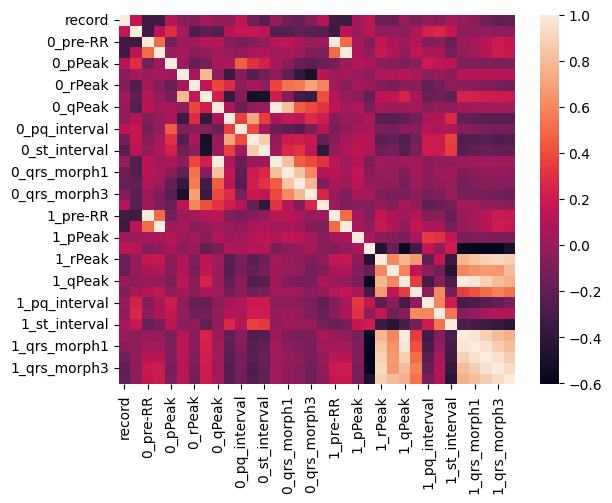

In [131]:
#check for correlations using heatmaps
correlation = dataset.corr()
sns.heatmap(correlation)
correlation

In [132]:
le = LabelEncoder()
sampleOfData['type'] = le.fit_transform(sampleOfData['type'])

In [133]:
sampleOfData

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
63337,1,427.0,419.0,-0.072301,0.013320,0.463277,-0.739622,-0.081020,25.0,4.0,...,-0.078768,28.0,4.0,41.0,9.0,-0.078768,-0.047670,0.273848,0.847821,0.246967
68829,1,214.0,215.0,0.047461,-0.168440,0.877644,-0.611761,0.037344,26.0,4.0,...,-0.053521,9.0,3.0,26.0,14.0,-0.053521,-0.075167,-0.143163,-0.238594,-0.332626
10919,1,380.0,390.0,0.061580,0.063515,-0.102084,-0.354770,-0.102084,5.0,5.0,...,-0.035122,37.0,5.0,43.0,1.0,-0.035122,-0.030646,-0.014970,0.094855,0.500537
8223,1,255.0,250.0,-0.125530,-0.225178,0.619273,-0.533149,-0.126829,29.0,2.0,...,-0.007846,10.0,4.0,24.0,10.0,-0.007846,-0.033787,-0.057213,-0.074230,-0.086312
21774,1,229.0,218.0,-0.090735,-0.554551,1.412631,-0.745406,-0.175248,30.0,12.0,...,-0.009957,27.0,5.0,38.0,6.0,-0.009957,0.010007,0.040053,0.263466,0.207135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54434,1,317.0,336.0,-0.002058,-0.239187,1.686935,-0.750705,-0.073855,22.0,7.0,...,0.050136,22.0,6.0,36.0,8.0,0.050136,0.139954,0.559698,0.967185,0.155287
45767,1,316.0,304.0,-0.022320,1.536322,1.496115,1.496115,-0.023033,15.0,2.0,...,-0.011998,20.0,6.0,39.0,13.0,-0.011998,0.015505,0.093933,0.086516,-0.217148
48253,1,240.0,256.0,0.175128,-0.567037,1.404313,-1.034850,-0.081337,43.0,25.0,...,-0.093865,12.0,9.0,39.0,18.0,-0.093865,-0.165530,-0.290419,-0.549246,-0.711865
55413,1,264.0,259.0,0.123089,0.276971,1.155491,-0.639675,-0.182059,60.0,18.0,...,-0.350021,1.0,16.0,39.0,22.0,-0.350021,-0.350021,-0.350021,-0.350021,-0.350021


Dataset distribution before SMOTE:
type
1    13425
4     1035
3      406
0      132
Name: count, dtype: int64
Dataset distribution after SMOTE:
type
1    13425
4    13425
3    13425
0    13425
Name: count, dtype: int64


C:\Users\Maksym Marek\AppData\Local\Temp\ipykernel_31392\361663458.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_smote.value_counts().index, y=y_smote.value_counts().values, palette='deep')


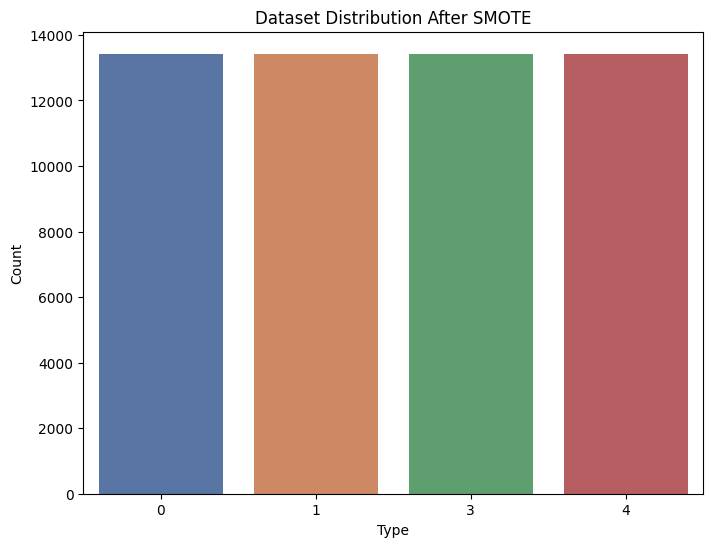

In [134]:
from imblearn.over_sampling import SMOTE

SampleDataset_smote = sampleOfData.copy()

# we remove type 2 because this is an unknown resualt for the tests performed
SampleDataset_smote = SampleDataset_smote[SampleDataset_smote['type'] != 2]

#We are focusing on creating equal numbers for the type of heart beat
X = SampleDataset_smote.drop(columns=['type'])
y = SampleDataset_smote['type']

#Here is smote 
smote = SMOTE(random_state=777) 
X_smote, y_smote = smote.fit_resample(X, y)

#Combine the resampled features back into "dataset_smote"
SampleDataset_smote = pd.concat([X_smote, y_smote], axis=1) 

#Before
print("Dataset distribution before SMOTE:")
print(y.value_counts())

#After
print("Dataset distribution after SMOTE:")
print(y_smote.value_counts())

#Visualization via bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=y_smote.value_counts().index, y=y_smote.value_counts().values, palette='deep')
plt.title('Dataset Distribution After SMOTE')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#print(SampleDataset_smote.columns)

## Identify the most optimized model

### TODO: Decision Tree, Random Forest, and K-Nearest Neighbors
### TODO: Display results and visualization 

In [135]:
# Target --> identifying the type (N (Normal),  SVEB (Supraventricular ectopic beat)
# VEB (Ventricular ectopic beat), F (Fusion beat), and Q (Unknown beat))

# Features --> all other columns 
X = SampleDataset_smote.drop('type', axis=1)
y = SampleDataset_smote['type']

# Making categorical data into a numerical format 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

# Logistic Regression 
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(X_trainScaled, y_train)
yPredLogReg = logisticReg.predict(X_testScaled)

accuracyLog = accuracy_score(y_test, yPredLogReg)
precision = precision_score(y_test, yPredLogReg, average='weighted')
recall = recall_score(y_test, yPredLogReg, average='weighted')
f1 = f1_score(y_test, yPredLogReg, average='weighted')
cm = confusion_matrix(y_test, yPredLogReg)

print(f"Accuracy: {accuracyLog}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8473929236499069
Precision: 0.8473918375575803
Recall: 0.8473929236499069
F1 Score: 0.8469802465413072
Confusion Matrix:
[[2301  164   74   62]
 [ 169 2152  258  142]
 [  33   87 2448  187]
 [ 125  180  158 2200]]
